#### **First Step**: Consulting data to the Database


Task:

- Establish connection to the database
- Load data into a dataframe as `df`


In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt


# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from connections.db import DB
db = DB()

In [2]:
# Fetch the data from the database as a dataframe
df = db.fetch_as_dataframe('../sql/queries/004_get_raw_data.sql')

2024-08-18 13:34:12,422 - ✔ Connected to database
2024-08-18 13:34:14,299 - ✔ Data loaded into DataFrame
2024-08-18 13:34:14,302 - ✔ Cursor closed
2024-08-18 13:34:14,303 - ✔ Connection closed


----

#### **Second Step**: Understanding what data we have:

Task:

- Understand the dataframe structure.
- Evaluate the data quality of the dataframe.
- Explore the category columns.
- Explore data distribution.
- Explore the temporal range of the data

In [3]:
# The first 5 rows of the dataframe
df.head()

,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [4]:
# Check the size of the dataframe
df.shape

(50000, 10)

In [5]:
# Check the columns of the dataframe
df.columns

Index(['First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country',
       'YOE', 'Seniority', 'Technology', 'Code_Challenge_Score',
       'Technical_Interview_Score'],
      dtype='object')

In [6]:
# Check the data types of the columns
df.dtypes

First_Name                   object
Last_Name                    object
Email                        object
Application_Date             object
Country                      object
YOE                           int64
Seniority                    object
Technology                   object
Code_Challenge_Score          int64
Technical_Interview_Score     int64
dtype: object

In [7]:
# Check the number of unique values for each column
df.nunique()

First_Name                    3007
Last_Name                      474
Email                        49833
Application_Date              1646
Country                        244
YOE                             31
Seniority                        7
Technology                      24
Code_Challenge_Score            11
Technical_Interview_Score       11
dtype: int64

> At this point, these are the findings we have:
>
> 1. The dataset has 50k records and 10 columns.
> 2. We have only 3 numeric columns (`YOE`,`Code Challenge Score`,`Technical Interview Score`).
> 3. We have 2 categorical columns (`Seniority`, `Technology`).
> 4. The `Application Date` column is not in the correct format.

----

DATA QUALITY

In [8]:
# Check the number of missing values in the columns
df.isnull().sum()

First_Name                   0
Last_Name                    0
Email                        0
Application_Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code_Challenge_Score         0
Technical_Interview_Score    0
dtype: int64

In [9]:
# Check the number of duplicated rows
df.duplicated().sum()

np.int64(0)

> Now, we can see that: 
> 
> 5. We have no null records.
> 6. We have no duplicate records.

---

* DATA DISTRIBUTIONS

In [10]:
df.describe()

,YOE,Code_Challenge_Score,Technical_Interview_Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


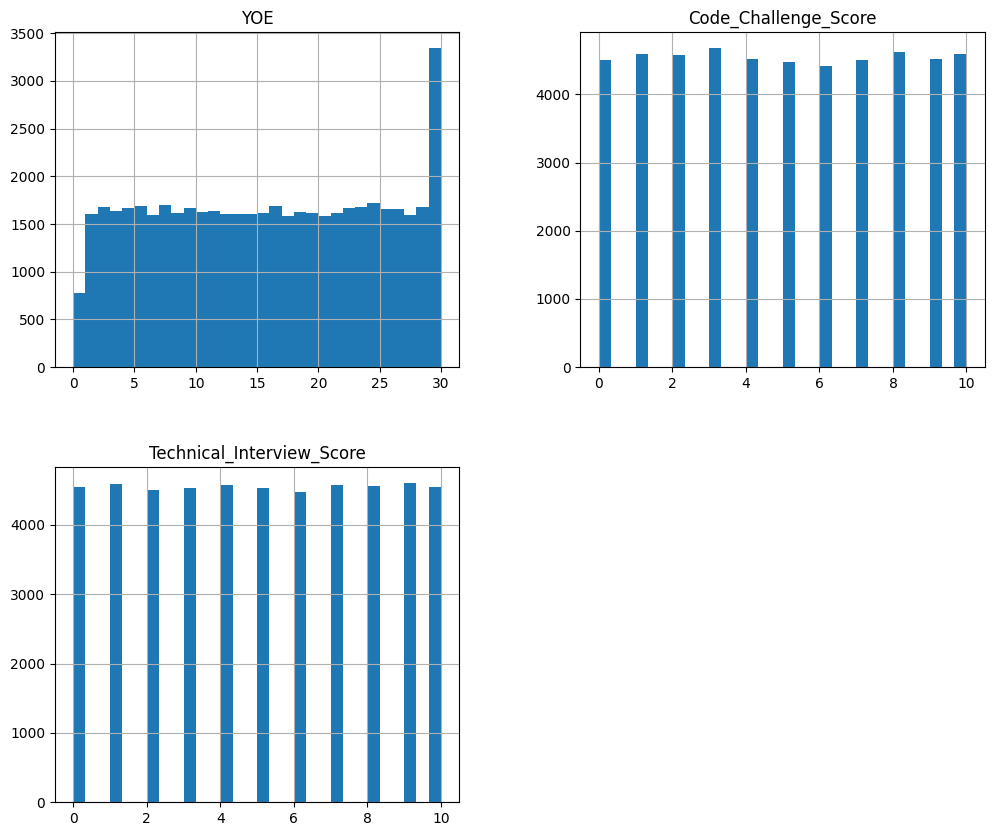

In [11]:
# Histogram to show the distribution
df.hist(bins=30, figsize=(12, 10))
plt.show()

> In this case, we can say that: 
> 
> 7. The data have been randomly generated and therefore have nearly uniform distributions.

---

* CATEGORY COLUMNS.

In [12]:
# Check the values of the 'Seniority' column
df['Seniority'].value_counts()

Seniority
Intern       7255
Mid-Level    7253
Trainee      7183
Junior       7100
Architect    7079
Lead         7071
Senior       7059
Name: count, dtype: int64

In [13]:
# Check the values of the 'Technology' column
df['Technology'].value_counts()

Technology
Game Development                           3818
DevOps                                     3808
Social Media Community Management          2028
System Administration                      2014
Mulesoft                                   1973
Development - Backend                      1965
Development - FullStack                    1961
Adobe Experience Manager                   1954
Data Engineer                              1951
Security                                   1936
Business Intelligence                      1934
Development - CMS Frontend                 1934
Database Administration                    1933
Client Success                             1927
Design                                     1906
QA Manual                                  1902
Technical Writing                          1901
QA Automation                              1892
Sales                                      1890
Development - Frontend                     1887
Development - CMS Backend    

<Axes: title={'center': 'Seniority Distribution'}>

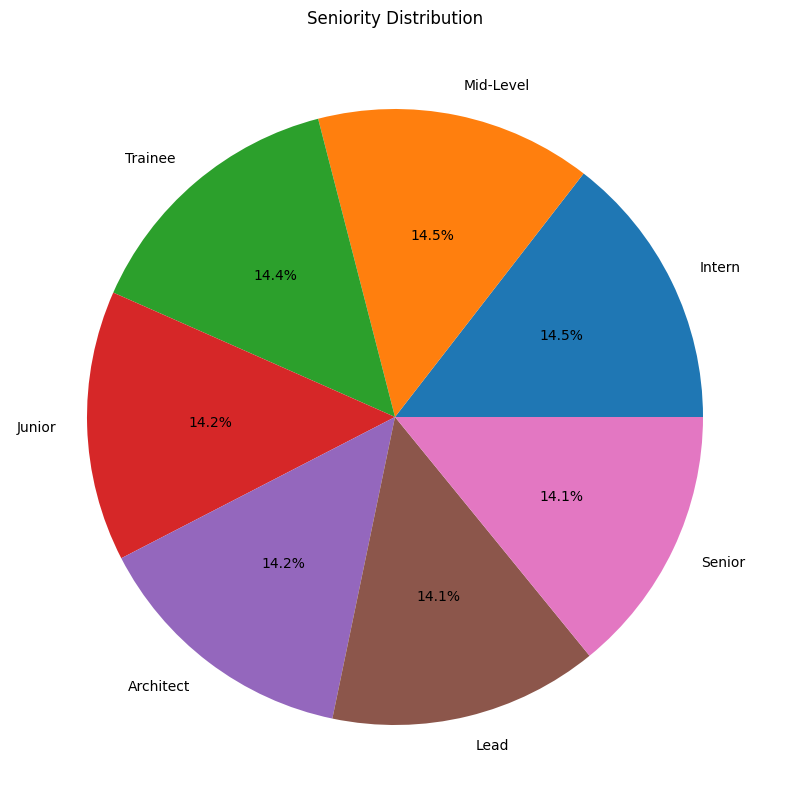

In [14]:
# Distribution of the 'Seniority' column
df['Seniority'].value_counts().plot(kind='pie' ,autopct='%1.1f%%', figsize=(10, 10), title='Seniority Distribution', ylabel='')


<Axes: title={'center': 'Seniority Distribution'}, xlabel='Seniority', ylabel='Count'>

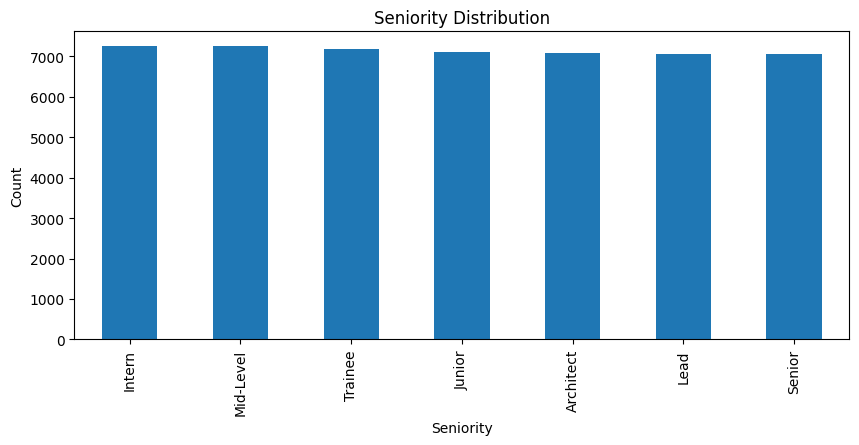

In [15]:
# Distribution of the 'Seniority' column
df['Seniority'].value_counts().plot(kind='bar', figsize=(10, 4), title='Seniority Distribution', ylabel='Count', xlabel='Seniority')

<Axes: title={'center': 'Technology Distribution'}>

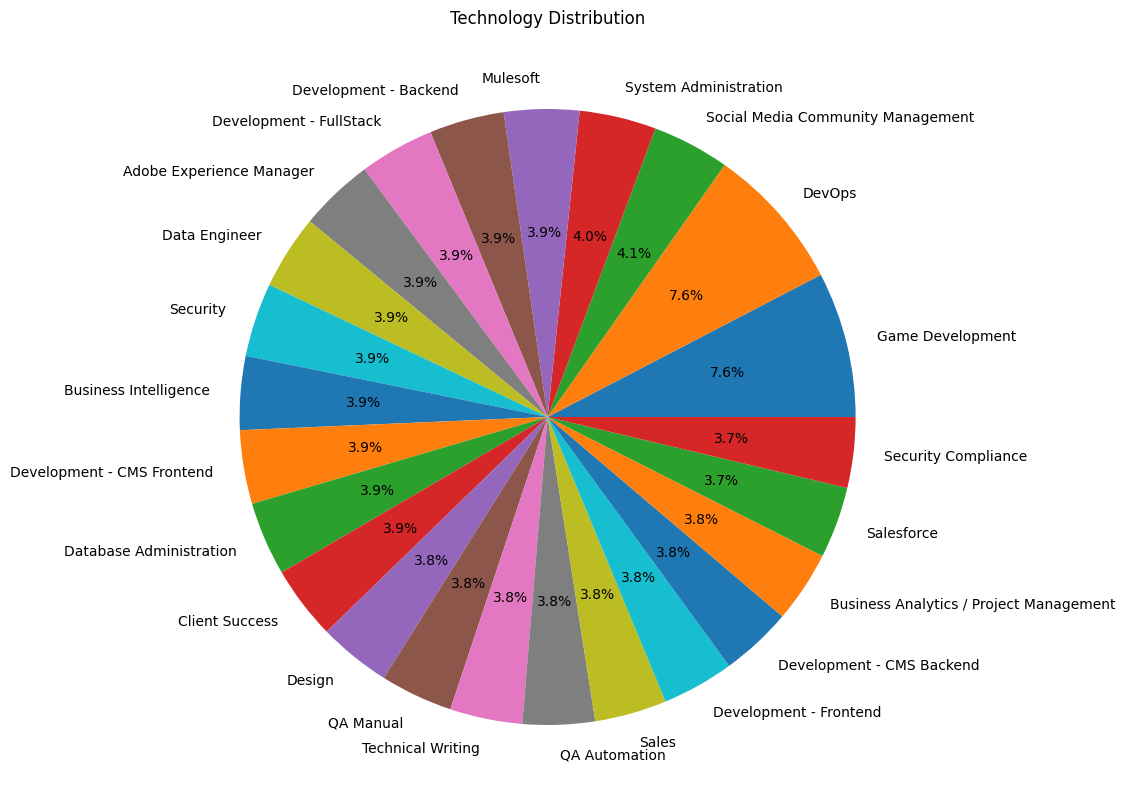

In [16]:
# Distribution of the 'Technology' column
df['Technology'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Technology Distribution', ylabel='')


<Axes: title={'center': 'Technology Distribution'}, xlabel='Count', ylabel='Technology'>

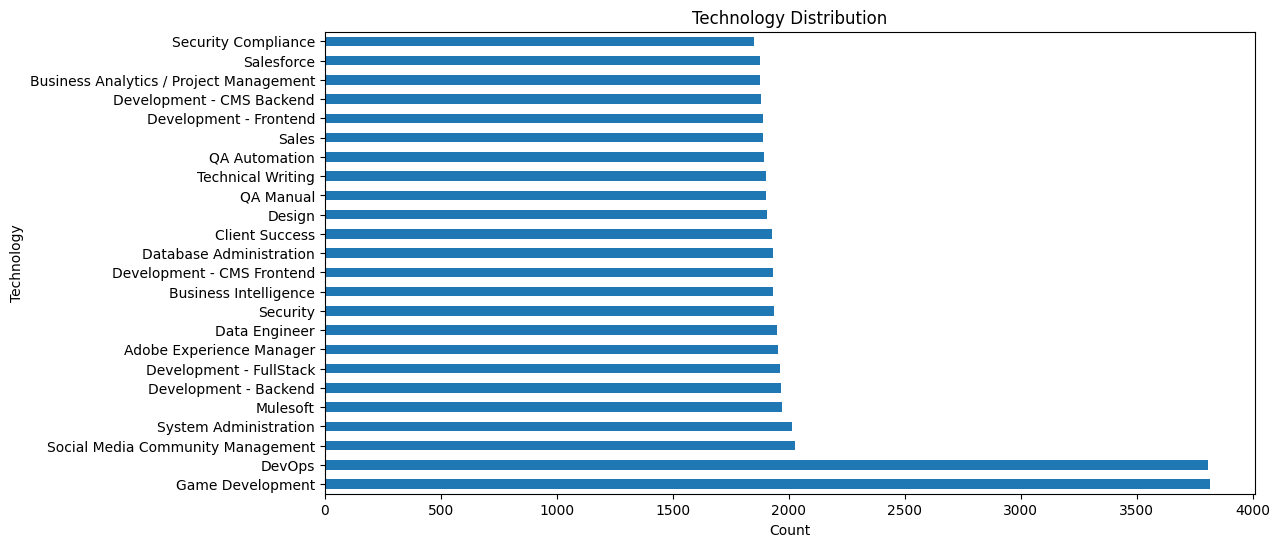

In [17]:
# Distribution of the 'Technology' column
df['Technology'].value_counts().plot(kind='barh', figsize=(12, 6), title='Technology Distribution', ylabel='Technology', xlabel='Count')

> On the part of the categorical columns we can say that: 
>
> 8. The distribution of Seniority is not very relevant since it is in almost equal proportions. 
> 9. On the part of the distribution of Technology we have an almost uniform distribution, except for the categories 'DevOps' and 'Game Development'.

---

* TIME COLUMN

In [18]:
# Convert the 'Date' column to datetime
df['Application Date'] = pd.to_datetime(df['Application Date'])

KeyError: 'Application Date'

In [ ]:
# How many years of data do we have?
df['Year'] = df['Application Date'].dt.year

print(f'The dataset has a time range of {df['Year'].max() - df['Year'].min()} years.')

The dataset has a time range of 4 years.


In [ ]:
# What is the time range of the data? (by year)

print(f'({df['Year'].min()},{df['Year'].max()})')

(2018,2022)


<Axes: title={'center': 'Yearly Distribution'}, xlabel='Year', ylabel='Count'>

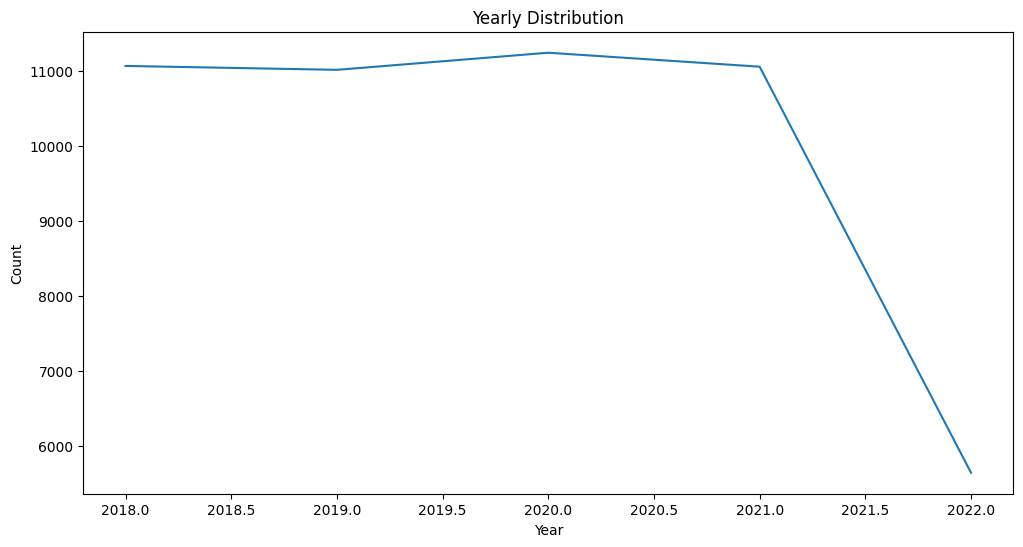

In [ ]:
# Distribution of the 'Year' column
df['Year'].value_counts().sort_index().plot(kind='line', figsize=(12, 6), title='Yearly Distribution', ylabel='Count', xlabel='Year')

In [ ]:
# How many months of data do we have for each year?
for _ in range(df['Year'].min(), df['Year'].max() + 1):
    
    df_year = df[df['Application Date'].dt.year == _]
    month_count = df_year['Application Date'].dt.month.nunique()

    print(f'Number of months in the year {_} is:', month_count)

Number of months in the year 2018 is: 12
Number of months in the year 2019 is: 12
Number of months in the year 2020 is: 12
Number of months in the year 2021 is: 12
Number of months in the year 2022 is: 7


In [ ]:
df_2022 = df[df['Application Date'].dt.year == 2022]
df_2022_monthly = df_2022['Application Date'].dt.month.value_counts().sort_index()
print(df_2022_monthly)

Application Date
1    912
2    844
3    962
4    923
5    979
6    910
7    112
Name: count, dtype: int64


> Finally the findings on the temporal range of the data are: 
> 
> 10. The data are from a continuous period of 4 years.
> 11. The temporal range is from 2018 to 2022.
> 12. In the year 2022 we only have records up to month 7 (which leaves us with a continuous range of 3.5 years).

---


#### **Results**:

1. The dataset has 50k records and 10 columns.
2. We have only 3 numeric columns (`YOE`,`Code Challenge Score`,`Technical Interview Score`).
3. We have 2 categorical columns (`Seniority`, `Technology`).
4. The `Application Date` column is not in the correct format.
5. We have no null records.
6. We have no duplicate records.
7. The data have been randomly generated and therefore have nearly uniform distributions.
8. The distribution of Seniority is not very relevant since it is in almost equal proportions. 
9. On the part of the distribution of Technology we have an almost uniform distribution, except for the categories 'DevOps' and 'Game Development'.
10. The data are from a continuous period of 4 years.
11. The temporal range is from 2018 to 2022.
12. In the year 2022 we only have records up to month 7 (which leaves us with a continuous range of 3.5 years).

---